**Introduction**: <br>
1. A higher-order function is a function that takes a function as an input or returns a function as output. <br>
2. Two higher order functions: <br>
(1) **closure**: a function that takes a function as input and returns another function as output <br>
(2) **functionals**: a function that takes a function as input and returns a vector as output.
3. Three most commonly used functional: `lapply()`, `apply()`, and `tapply()`.<br>
All three take a function as input (among other things) and return a vector as output.
4. A common use of functions is as an alternative to for loops. 
5. Downside of for loops in R: slow, and they are not very expressive. <br>
6. Instead of using a for loop, it's better to use a functional. <br>
7. **Why it's good to use functional**: <br>
(1) Each functional is tailored for a specific task, so when you recognize a functional you know immediately why it's being used. <br>
(2) It's also useful for encapsulating common data manipulation tasks like split-apply-combine, for thinking "functionally", and for working with mathematical functions.
8. Functionals in base R are bug-free and efficient. <br>
Many are written in C, and use special tricks to enhance performance. <br>
(1) Using functionals will not always produce fastest code. <br>
(2) Instead, it helps you clearly communicate and build tools that solve a wide range of problems.<br>
It's a mistake to focus on speed until you know it'll be a problem. <br>
Once you have a clear correct code, you can make it fast by optimizing your code. 

In [2]:
# Example 1: a simple functional

# create function
randomize <- function(f) f(runif(1e3))

# test
randomize(mean)
randomize(mean)
randomize(sd)

[1] 0.5027897

[1] 0.5024813

[1] 0.2934428

## First functional: `lapply()`

1. The simplest functional is `lapply()`, which takes a function, applies it to each element in a list, and returns the results in form of a list.
2. `lapply()` is written in C for performance, but we can create a simple R implementation that does same thing. See example 1. 
3. You can see that `lapply()` is a wrapper for a common for loop pattern: create a container for output, apply f() to each component of a list, and fill the container with the results. <br>
Note: <br>
A **wrapper function** is just a function which wraps another function. Maybe inside it does something like set some default values for parameters, etc. 
4. All other for loop functionals are variations on this theme:they simply use different types of input or output.
5. `lapply()` makes it easier to work with lists by eliminating much of the boilerplate associated with looping. This allows you to focus on the function that you're applying.
6. The pieces of x are always supplied as the first argument to f. <br>
If you want to vary a different argument, can use anonymous function.

In [ ]:
# Example 0: create a wrapper function

# can use mean(x, na.rm = T) but it requires more typing
# want to do something like this: mean() and still removes missing values 
# can wrap function mean() inside another function that allows remove NAs by default
mean_noNA <- function(x) 
    return(mean(x, na.rm = T))
}

In [ ]:
# Example 1: create lapply() function

# create a simple lapply() function
lapply2 <- function(x, f, ...) {
    out <- vector("list", length(x))
    for (i in seq_along(x)) {
        out[[i]] <- f(x[[i]], ...)
    }
    out
}

In [13]:
# Example 2: use lapply() on a vector 

# compare for loop and lapply()

# create data 
vec <- replicate(20, 
                runif(sample(1:20, 1)), 
                simplify = FALSE)

# ------ (1) use for loop 
out <- vector("list", length(vec))
for (i in seq_along(vec)) {
    out[[i]] <- length(vec[[i]]) 
}
unlist(out)

# ------ (2) use lapply()
# use unlist() to convert list to vector: more compact
unlist(lapply(vec, length))

[1] 13 16  6  3 10  2 19 18 11 14  2 11 10 15 18  5  6 12  8  6

[1] 13 16  6  3 10  2 19 18 11 14  2 11 10 15 18  5  6 12  8  6

In [17]:
# Example 3: use lapply() on a data frame

# find class/type of each column
unlist(lapply(mtcars, class))

mpg       cyl      disp        hp      drat        wt      qsec        vs 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
       am      gear      carb 
"numeric" "numeric" "numeric"

In [21]:
# Example 4: use lapply() on a data frame

# divide each column by its mean
mtcars[] <- lapply(mtcars, function(x) x / mean(x))
head(mtcars,3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,1.045264,0.9696970,0.6934756,0.7498935,1.084369,0.8143601,0.9221934,0.000000,2.461538,1.084746,1.4222222
Mazda RX4 Wag,1.045264,0.9696970,0.6934756,0.7498935,1.084369,0.8936203,0.9535682,0.000000,2.461538,1.084746,1.4222222
Datsun 710,1.134858,0.6464646,0.4680961,0.6340009,1.070467,0.7211128,1.0426500,2.285714,2.461538,1.084746,0.3555556


In [31]:
# Example 5: vary amount of trimming for mean

# trim vector 
# here, if trim = 0, then it's the default mean
# if trim = 0.1, then we remove floor(0.1*1000) observations from both end of sorted x
# if trim = 0.2, then we remove floor(0.2*1000) observations from both end of sorted x
# if trim = 0.5, then we remove floor(0.5*1000) observations from both end of sorted x
trim <- c(0, 0.1, 0.2, 0.5)
# x vector 
x <- rcauchy(1000)

# mean with different levels of trims
unlist(lapply(trim, function(trim) mean(x, trim = trim)))

[1] 0.29914058 0.03317950 0.02410105 0.04586685

In [33]:
# Example: # how trim in mean() works 

# default mean(): 
# mean(x, trim = 0, na.rm = FALSE, ...)

# create vector 
x <- c(1, 3, 2, 3, 4, 2, 5, 10)

# ------ (1) default mean
cat("Default mean result: ")
mean(x)

# ------ (2) trim mean 
cat("Trimmed mean result: ")
mean(x, trim = 0.2)

# ------ (3) verify trim mean works 
# step 1: 
# sort x from smallest to largest 
cat("Ordered x is like this: ")
sort(x)

# step 2: 
# trim = 0.2, so we remove (trim) 20% of observations from both end of sorted data  
# length(x) = 8
cat("Number of observations we need to remove from both end of vector x: ")
floor(0.2 * 8)

# step 3: 
# create a new vector (trimmed 1 observation from both end of sorted x)
y <- c(2, 2, 3, 3, 4, 5)
cat("Trimmed mean result (by hand): ")
mean(y)

Default mean result: 

[1] 3.75

Trimmed mean result: 

[1] 3.166667

Ordered x is like this: 

[1]  1  2  2  3  3  4  5 10

Number of observations we need to remove from both end of vector x: 

[1] 1

Trimmed mean result (by hand): 

[1] 3.166667

### Looping patterns

1. There are 3 basic ways to loop over a vector: <br><br>
(1) loop over elements: `for (x in xs)` (SLOW) <br>
It leads to inefficient ways of saving output. It is slow because each time you extend the vector, R has to copy all of the existing elements. <br><br>
(2) loop over numeric indices: `for (i in seq_along(xs)` (FAST) <br>
It's better to create the space you'll need for output and then fill it in.<br><br>
(3) loop over names: `for (nm in names(xs))` (???) <br><br>

2. There are 3 basic ways to use `lapply()`: <br>
(1) lapply over elements: `lapply(xs, function(x) {})`<br>
Typically use this form because lapply() takes care of saving output for you.<br><br>
(2) lapply over numeric indices: `lapply(seq_along(xs), function(i) {}` <br>
If you need to know position of element you're working with, use this form. It gives you element's position (nm) and value (xs[[i]]) <br><br>
(3) lapply over names: `lapply(names(xs), function(nm) {}`<br>
If you need to know name of element you're working with, use this form. It gives you element's position (nm) and value (xs[[nm]])

In [39]:
# Example 1: 
# loop over elements is slow 

# create vector
xs <- runif(1e3)
res <- c()

# for loop 
for (x in xs) {
    res <- c(res, sqrt(x))
}

# result 
head(res)

[1] 0.9321734 0.3361294 0.8171617 0.8100313 0.9446709 0.9442357

In [42]:
# Example 2: 
# loop over numeric indices is fast 

# create vector
xs <- runif(1e3)
res <- numeric(length(xs))

# for loop 
for (i in seq_along(xs)) {
    res[i] <- sqrt(xs[i])
}

# result 
head(res)

[1] 0.5528542 0.9232314 0.4249956 0.9666742 0.7259636 0.4989897

### Exercises

Question 1. Why are following 2 invocations of lapply() equivalent? <br><br>

```R
trims <- c(0, 0.1, 0.2, 0.5)
x <- rcauchy(100)

lapply(trims, function(trim) mean(x, trim = trim))
lapply(trims, mean, x = x)       
```

Answer 1. Note that mean()'s default argument is `mean(x, trim = 0, na.rm = FALSE, …)`<br><br>
In code 1, each element of trims is explicitly supplied to mean()’s second argument. <br><br>
In code 2, this happens via positional matching, since mean()’s first argument is supplied via name in lapply()’s third argument (...)

In [7]:
# ------ Q1

# create vectors 
trims <- c(0, 0.1, 0.2, 0.5)
x <- rcauchy(100)

# code 1 
# each element of trims is explicitly supplied to mean()’s second argument.
lapply(trims, function(trim) mean(x, trim = trim))

# code 2
# this happens via positional matching, since mean()’s first argument is supplied 
# via name in lapply()’s third argument (...)
lapply(trims, mean, x = x)       

[[1]]
[1] 1.362249

[[2]]
[1] 0.09585001

[[3]]
[1] 0.05829434

[[4]]
[1] 0.03445201

[[1]]
[1] 1.362249

[[2]]
[1] 0.09585001

[[3]]
[1] 0.05829434

[[4]]
[1] 0.03445201

Question 2. The function below scales a vector so it falls in the range [0, 1]. <br>
How would you apply it to every column of a data frame? <br>
How would you apply it to every numeric column in a data frame?

```
scale <- function(x) {
    range <- range(x, na.rm = TRUE)
    (x - range[1]) / (range[2] - range[1])
}
```

Answer 2. Since this function needs numeric input, one can check this via an if clause. If one also wants to return non-numeric input columns, these can be supplied to the else argument of the if() “function”.

In [17]:
# ------ Q2

# create data 
df <- data.frame(a = c(2, 4, 2),
                 b = c(4, 5, 6),
                 c = c(10, 99, 88))

# create scale function
scale <- function(x) {
    range <- range(x, na.rm = TRUE)
    (x - range[1]) / (range[2] - range[1])
}

# apply to all data 
df[] <- lapply(df, scale)
df

# create data 
df2 <- data.frame(a = c(2, 4, 2),
                 b = c(4, 5, 6),
                 c = c(10, 99, 88),
                 d = c("a", "b", "c"))

# apply to only numeric variables 
# Note: output of this is a list:
# lapply(df2, function(x) if (is.numeric(x)) scale(x) else x)
df3 <- data.frame(lapply(df2, function(x) if (is.numeric(x)) scale(x) else x))
df3

a,b,c
0,0.0,0.0000000
1,0.5,1.0000000
0,1.0,0.8764045


a,b,c,d
0,0.0,0.0000000,a
1,0.5,1.0000000,b
0,1.0,0.8764045,c


Question 3: Use both for loops and lapply() to fit linear models to the mtcars using the formulas stored in this list:

```
formulas <- list(
    mpg ~ disp,
    mpg ~ I(1 / disp),
    mpg ~ disp + wt,
    mpg ~ I(1 / disp) + wt
)
```

In [32]:
# ------ Q3 

# create a list of formulas 
formulas <- list(
    mpg ~ disp,
    mpg ~ I(1 / disp),
    mpg ~ disp + wt,
    mpg ~ I(1 / disp) + wt
)

# my solution
lapply(formulas, function(formulas) lm(formulas, data = mtcars))
       
# KEY 
# lapply (2 versions)
# lm(formula, data)
la1 <- lapply(formulas, lm, data = mtcars)
la2 <- lapply(formulas, function(x) lm(formula = x, data = mtcars))

# for loop
lf1 <- vector("list", length(formulas))
for (i in seq_along(formulas)){
  lf1[[i]] <- lm(formulas[[i]], data = mtcars)
} 

[[1]]

Call:
lm(formula = formulas, data = mtcars)

Coefficients:
(Intercept)         disp  
   29.59985     -0.04122  


[[2]]

Call:
lm(formula = formulas, data = mtcars)

Coefficients:
(Intercept)    I(1/disp)  
      10.75      1557.67  


[[3]]

Call:
lm(formula = formulas, data = mtcars)

Coefficients:
(Intercept)         disp           wt  
   34.96055     -0.01772     -3.35083  


[[4]]

Call:
lm(formula = formulas, data = mtcars)

Coefficients:
(Intercept)    I(1/disp)           wt  
     19.024     1142.560       -1.798  



Question 4. Fit the model mpg ~ disp to each of the bootstrap replicates of mtcars in the list below by using a for loop and lapply(). Can you do it without an anonymous function?

```
bootstraps <- lapply(1:10, function(i) {
  rows <- sample(1:nrow(mtcars), rep = TRUE)
  mtcars[rows, ]
})
```

In [36]:
# ------ Q4 

# create bootstrap function 
# this create a list of 10 data sample 
bootstraps <- lapply(1:10, function(i) {
  rows <- sample(1:nrow(mtcars), rep = TRUE)
  mtcars[rows, ]
})

# apply formula to every list 
lapply(bootstraps, lm, formula = mpg ~ disp)

# KEY 
# lapply without anonymous function
la <- lapply(bootstraps, lm, formula = mpg ~ disp)

# for loop
lf <- vector("list", length(bootstraps))
for (i in seq_along(bootstraps)){
  lf[[i]] <- lm(mpg ~ disp, data = bootstraps[[i]])
}

[[1]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   28.20788     -0.03698  


[[2]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   30.02358     -0.04291  


[[3]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   30.88954     -0.04523  


[[4]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   30.67387     -0.04192  


[[5]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   30.58061     -0.04041  


[[6]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   29.22339     -0.04036  


[[7]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   26.65106     -0.03377  


[[8]]

Call:
FUN(formula = ..1, data = X[[i]])

Coefficients:
(Intercept)         disp  
   26.25928     -0.03256  


[[9]]

Call:
FUN(formula = ..1, data = X[[i]])

Coeffici

Question 5. For model in Question 4, extract $R^2$ using the function below.

```
rsq <- function(mod) summary(mod)$r.squared
```

In [40]:
# ------ Q5
# create function
rsq <- function(mod) summary(mod)$r.squared

# my method: this returns a list
lapply(la, rsq) 

# KEY 
# this returns a vector 
sapply(la, rsq)

[[1]]
[1] 0.7834802

[[2]]
[1] 0.7434798

[[3]]
[1] 0.7408606

[[4]]
[1] 0.7386584

[[5]]
[1] 0.6393149

[[6]]
[1] 0.6644785

[[7]]
[1] 0.6611467

[[8]]
[1] 0.7336269

[[9]]
[1] 0.7604674

[[10]]
[1] 0.7090393

[1] 0.7834802 0.7434798 0.7408606 0.7386584 0.6393149 0.6644785 0.6611467
 [8] 0.7336269 0.7604674 0.7090393

## For loop functionals: friends of lapply()

1. The key to using functionals in place of for loops is recognizing that common looping patterns are already implemented in existing base functions.<br>
If you find you;re duplicating the same looping pattern in many places, you should extract it out into its own function.<br><br>
2. Use lapply() variations: <br><br>
(1) `lapply()` returns list as output, while `sapply()` and `vapply()` return vectors / matrices and arrays as output. <br><br>
(2) `Map()` and `mapply()` iterate over multiple input data structures in paralle. <br><br>
(3) `mcapply()` and `mcMap()` are parallel versions of lapply() and Map().<br><br>
(4) Wring a new function, `rollapply()`, to solve a new problem.

### Vector output: sapply and vapply

1. sapply() and vapply() simplify output and produce an atomic vector (lapply returns a list). <br><br>
(1) `sapply()` It guesses. <br>
Good: sapply() is great for interactive use because it saves typing. <br>
Bad: Not suited for use inside other functions. <br>
(You get weird errors if you supply wrong type of input). <br><br>
(2) `vapply()` Takes additional argument specifying output type. <br>
Good: It's suited for use inside other functions.<br>
Bad: It's more verbose.<br>
(but gives more informative error messages and never fails silently.)<br><br>

Example 1: when given data frame, sapply() and vapply() return same results.<br>
When given empty list, sapply() return another empty list, while vapply() returns zero-length logical vector (more informative).<br><br>

2. If function returns results of different types / lengths: <br><br>
(1) sapply() will silently return a list; <br>
sapply() is fine for interactive use b/c you'll normally notice if sth goes wrong,<br>
but it's dangerous when writing functions (since you can't see the error).<br>
If you falsely assume that class only has one value and use sapply(), yo won't find out about the problem until some future function is given a list instead of a character vector.<br><br>
(2) vapply() will throw an error. <br><br>

3. Compare sapply() and vapply(): <br><br>
(1) `sapply()` is a thin wrapper around lapply() that transforms a list into a vector in the final step. <br><br>
(2) `vapply()` is an implementation of lapply() that assigns results to a vector (or matrix) of appropriate type instead of as a list.

In [48]:
# Example 1_1: data frame 

# ------ (1) sapply()
sapply(mtcars, is.numeric)

# ------ (2) vapply()
vapply(mtcars, is.numeric, logical(1))

# Example 1_2: empty list 

# ------ (1) sapply()
# it returns this in RStudio
sapply(list(), is.numeric)
#> list()

# ------ (2) vapply()
# it returns this in RStudio
vapply(list(), is.numeric, logical(1))
#> logical(0)

mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [57]:
# Example 2: variable of same/different type

# ------ (1) data: variables are all numeric

# create data 
df <- data.frame(x = 1:10, y = letters[1:10])

# sapply()
cat("sapply() results: ")
sapply(df, class)

# vapply()
cat("vapply() results: ")
vapply(df, class, character(1))

# ------ (2) data: NOT all variables are all numeric

# create data 
df2 <- data.frame(x = 1:10, y = Sys.time() + 1:10)

# sapply()
cat("sapply() results: ")
sapply(df2, class)

# vapply()
cat("vapply() results: ")
vapply(df2, class, character(1))

sapply() results: 

x         y 
"integer"  "factor"

vapply() results: 

x         y 
"integer"  "factor"

sapply() results: 

$x
[1] "integer"

$y
[1] "POSIXct" "POSIXt"

vapply() results: 

ERROR: Error in vapply(df2, class, character(1)): values must be length 1,
 but FUN(X[[2]]) result is length 2


In [ ]:
# Example 3: replicate essence of sapply() and vapply()

# create function: sapply
sapply2 <- function(x, f, ...) {
    res <- lapply2(x, f, ...)
    simplify2array(res)
}

# create function: lapply
vapply2 <- function(x, f, f.value, ...) {
    out <- matrix(rep(f.value, length(x)), nrow = length(x))
    for (i in seq_along(x)) {
        res <- f(x[i], ...)
        stopifnot(
        length(res) == length(f.value),
        typeof(res) == typeof(f.value)
        )
        out[i, ] <- res
    }
    out    
}

### Multiple inputs: Map( )  &emsp;&emsp; (and mapply( ))

1. With lapply(), only 1 argument to the function varies, the others are fixed.<br>
This makes it poorly suited for some problems. <br><br>

Example 1: Find weighted means for a vector. <br>
Attempt 1: We can use lapply to find unweighted means. <br>
Attempt 2: write a wrapper with lapply to find weighted means (but clumsy). <br>
Attempt 3: use `Map()` to simplify the process and still find weighted means.<br><br>

2. There's a natural equivalence between Map() and lapply() because you can alway convert a Map() to lapply() that iterates over indices.<br><br>

3. But using `Map()` is more concise, and more clearly indicates what you're trying to do.<br><br>

4. When use Map()? <br><br>
It's useful when you more $\geq$ 2 lists / data frames that you need to process in parallel. <br><br>

5. Why try not to use mapply()? <br>
(1) Map() is preferred because it's equivalent to mapply with `simplify = FALSE`, which is almost always what you want. <br>
(2) mapply has `MoreArgs` arguments. This breaks R's usual lazy evaluation semantics and is inconsistent with other functions.

In [87]:
# Exmaple 0_1: how to use runif()

# default setting
# runif(n, min = 0, max = 1)
# this generate 5 random numbers between [0, 1]
cat("Default runif() is between [0, 1] : ")
runif(5)

# this generate 5 random numbers, specify min max between [10, 20]
cat("Specify runif() range is between [10, 20] : ")
runif(5, 10, 20)

# Exmaple 0_2: how to use replicate()

# create a list of 5 vectors, each vector is length of 10 and between [0, 1]  
# simplify = FALSE: returns a list 
cat("Replicate a list containing 5 vectors, each between [0, 1]")
(xs <- replicate(5, runif(10), simplify = FALSE))

# simplify = FALSE: returns a matrix 
cat("Replicate a matrix containing 5 vectors, each between [0, 1]")
(xs <- replicate(5, runif(10), simplify = TRUE))

Default runif() is between [0, 1] : 

[1] 0.5249679 0.7199648 0.6088578 0.9369408 0.7149335

Specify runif() range is between [10, 20] : 

[1] 16.72503 19.15868 11.14237 17.12772 18.66766

Replicate a list containing 5 vectors, each between [0, 1]

[[1]]
 [1] 0.543926393 0.054167595 0.299203351 0.514066081 0.964443799 0.019141948
 [7] 0.472464234 0.006578876 0.929103600 0.025440220

[[2]]
 [1] 0.9168859 0.7262467 0.9583494 0.3186684 0.9352814 0.6555076 0.5101086
 [8] 0.9540885 0.7364861 0.1599737

[[3]]
 [1] 0.93960254 0.77488032 0.07663037 0.85007609 0.09733736 0.23870702
 [7] 0.74379921 0.59865055 0.92595583 0.89855163

[[4]]
 [1] 0.7363013 0.8202946 0.7260164 0.4089677 0.2139558 0.6245994 0.7990180
 [8] 0.7918655 0.1083990 0.7210264

[[5]]
 [1] 0.9893535 0.7843176 0.5235518 0.2151539 0.8621396 0.7978871 0.8204107
 [8] 0.7294705 0.5878179 0.5826668

Replicate a matrix containing 5 vectors, each between [0, 1]

0.3723020,0.43102823,0.6410538,0.9173469,0.73861823
0.6439788,0.87873795,0.8336673,0.9699505,0.62911257
0.8095578,0.22421301,0.1191883,0.7566422,0.10455678
0.6748313,0.08246235,0.9448047,0.4356547,0.14224797
0.2224094,0.13932750,0.3916897,0.3352033,0.03163057
0.3650137,0.78349606,0.8068276,0.2372250,0.43791291
0.9147349,0.92571054,0.3311318,0.4513899,0.89930043
0.5313295,0.04094275,0.6621484,0.4308200,0.41440133
0.2251596,0.24332376,0.2484417,0.0333555,0.94137535
0.5204759,0.75851984,0.6635222,0.8479132,0.14684782


In [94]:
# Example 1

# create data: 
# it's a lists containing 5 vectors, each contain 10 random numbers between [0, 1]
# simplify = FALSE: returns a list 
# simplify = TRUE: returns a matrix 
xs <- replicate(5, runif(10), simplify = FALSE)

# create weights 
# it's 
ws <- replicate(5, rpois(10, 5) + 1, simplify = FALSE)

# Attempt 1: use lappy get unweighted means 
cat("Use lapply() get unweighted mean")
unlist(lapply(xs, mean))

# Attempt 2: use lappy get weighted means (clumsy)
cat("Use lapply() get weighted mean")
unlist(lapply(seq_along(xs), function(i) {
    weighted.mean(xs[[i]], ws[[i]])
}))

# Attempt 3: use Map() get weighted mean
cat("Use Map() get weighted mean")
unlist(Map(weighted.mean, xs, ws))

# Attempt 4: if some arguments should be fixed and constant, do this: 
cat("Use Map() get weighted mean with missing values: ")
Map(function(x, w) weighted.mean(x, w, na.rm = TRUE), xs, ws)

Use lapply() get unweighted mean

[1] 0.5346033 0.4486785 0.6301768 0.4579477 0.4032226

Use lapply() get weighted mean

[1] 0.5447928 0.3768996 0.6293967 0.4605212 0.4169112

Use Map() get weighted mean

[1] 0.5447928 0.3768996 0.6293967 0.4605212 0.4169112

Use Map() get weighted mean with missing values: 

[[1]]
[1] 0.5447928

[[2]]
[1] 0.3768996

[[3]]
[1] 0.6293967

[[4]]
[1] 0.4605212

[[5]]
[1] 0.4169112

In [ ]:
# Example 2: how Map() works 

stopifnot(length(xs) == length(ws))
out <- vector("list", length = xs)
for (i in seq_along(xs)) {
    out[[i]] <- weighted.mean(xs[[i]], ws[[i]])
}

In [ ]:
# Example 3: standardize columns 

# Attempt 1
mtcars[] <- lapply(mtcars, function(x) x / mean(x))
                   
# Attempt 2
# first, get means
mtmeans <- lapply(mtcars, mean)
# then, get divide x / mean(x)
mtcars[] <- Map(`/`, mtcars, mtmeans)

# Attemp 3
# if there are missing values 
Map(function(x, w) weighted.mean(x, w, na.rm = TRUE), xs, ws)

### Rolling computations

1. You can create your own for loop replacement by recognizing common looping structures and implementing your own wrapper. <br>
The rollapply in the example is the same as in `zoo:rollapply()`, which has more features and more error checking.

In [113]:
# Example 0: how to use trunc()

# trunc() behaves as:  
# a ceiling function for negative numbers and
# a floor function for positive numbers.

# -10.4 / 2 = 5.2
trunc_neg <- trunc(-10.4 / 2)
ceiling_neg <- ceiling(-10.4 / 2)

trunc_pos <- trunc(10.4 / 2)
floor_pos <- floor(10.4 / 2)

# compare results: 
cat("Compare trunc and ceiling results for a negative number: ")
(neg_num <- c(trunc_neg, ceiling_neg))

cat("Compare trunc and floor results for a positive number: ")
(pos_num <- c(trunc_pos, floor_pos))

Compare trunc and ceiling results for a negative number: 

[1] -5 -5

Compare trunc and floor results for a positive number: 

[1] 5 5

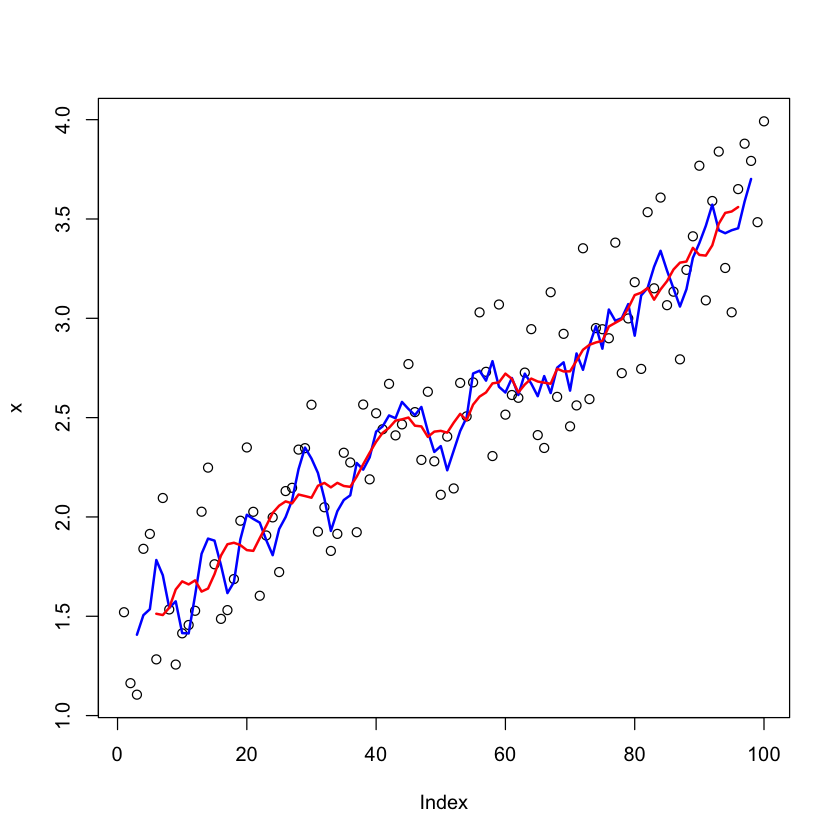

In [133]:
# Example 1_1: rolling / running mean function

# Attemp 1: rolling mean

# create rolling mean function
rollmean <- function(x, n) {
    out <- rep(NA, length(x))
    offset <- trunc(n / 2)
    for (i in (offset + 1):(length(x) - n + offset + 1)) {
        out[i] <- mean(x[(i - offset):(i + offset - 1)])
    }
    out 
}

# create vector 
x <- seq(1, 3, length = 1e2) + runif(1e2)

# plot
plot(x)
lines(rollmean(x, 5), col = "blue", lwd = 2)
lines(rollmean(x, 10), col = "red", lwd = 2)

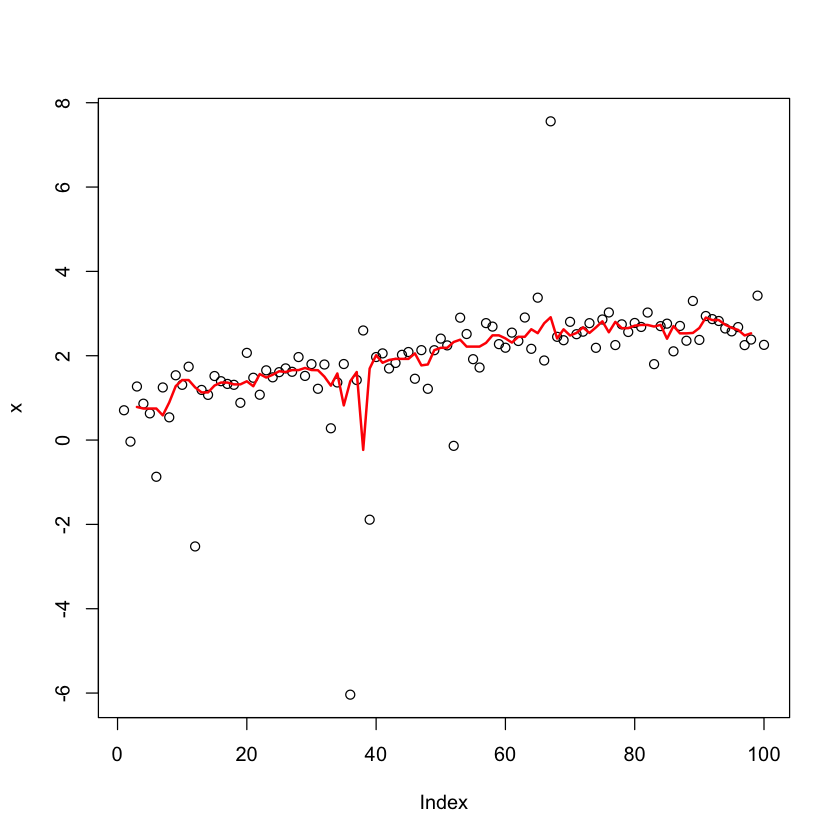

In [135]:
# Example 1_2: rolling median

# If noise was more variable (longer tail), 
# your rolling mean was too sensitive to outliers
# find rolling median instead 

# Attemp 2: rolling median

# create rolling median function
rollmedian <- function(x, n) {
    out <- rep(NA, length(x))
    offset <- trunc(n / 2)
    for (i in (offset + 1):(length(x) - n + offset + 1)) {
        out[i] <- median(x[(i - offset):(i + offset - 1)])
    }
    out 
}

# create vector 
x <- seq(1, 3, length = 1e2) + rt(1e2, df = 2) / 3

# plot
plot(x)
lines(rollmedian(x, 5), col = "red", lwd = 2)

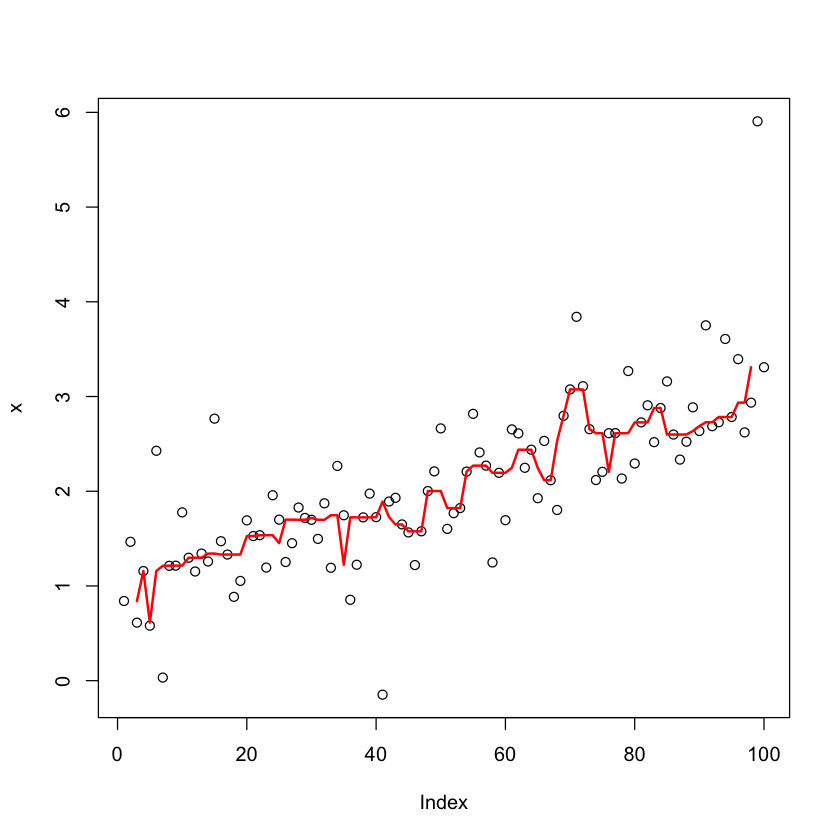

In [138]:
# Example 1_3: rolling function (lapply)

# Attempt 3: 

# create rolling function using lapply
rollapply <- function(x, n, f, ...) {
    out <- rep(NA, length(x))
    offset <- trunc(n / 2)
    for (i in (offset + 1):(length(x) - n + offset + 1)) {
        out[i] <- f(x[(i - offset):(i + offset)], ...)
    }
    out 
}

# create vector 
x <- seq(1, 3, length = 1e2) + rt(1e2, df = 2) / 3

# plot
plot(x)
lines(rollapply(x, 5, median), col = "red", lwd = 2)

In [ ]:
# Example 2: how rollapply works 

rollapply <- function(x, n, f, ...) {
    offset <- trunc(n / 2)
    locs <- (offset + 1):(length(x) - n + offset + 1)
    num <- vapply(
        locs,
        function(i) f(x[(i - offset):(i + offset)], ...),
        numeric(1)
    )
    c(rep(NA, offset), num)
}

### Parallelization

1. For lapply(), because each iteration isolated from others, the order in which they are computed doesn't matter.<br><br>
2. Important consequence: since we can compute each element in any order, it's easy to dispatch the tasks to different cores, and compute them in parallel.<br>
This is what `parallel::mclapply()` and `parallel::maMap()` do.<br><br>
3. `mcapply()` from **parallel** package in Example 2 is slower that `lapply()`. This is because the cost of individual computations is low, and additional work in needed to send the computation to different cores and to collect the results. <br><br>
Example 3: a more realistic example, generating bootstrap replicates of a linear model, takes better advantage of mcapply.<br><br>
4. While increasing number of cores will not always lead to linear improvement, switching from lapply() or Map() to its parallelized form can dramatically improve computational performance.

In [143]:
# Example 1

# define lapply3 
lapply3 <- function(x, f, ...) {
    out <- vector("list", length(x))
    for (i in sample(seq_along(x))) {
        out[[i]] <- f(x[[i]], ...)
    }
    out
}

# use lapply
cat("Results from original lapply(): ")
unlist(lapply(1:10, sqrt))

# use lapply3
cat("Results from new lapply() with random order: ")
unlist(lapply3(1:10, sqrt))

# look back lapply2
# the order in lapply2 is different from lapply3, but the resutls are same
lapply2 <- function(x, f, ...) {
    out <- vector("list", length(x))
    for (i in seq_along(x)) {
        out[[i]] <- f(x[[i]], ...)
    }
    out
}

# to see why the oder is different 
# define vector 
x <- c(1, 3, 45)
# order 1
cat("Order 1: from small to large")
seq_along(x)
# order 2
cat("Order 2: with random order")
sample(seq_along(x))

Results from original lapply(): 

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

Results from new lapply() with random order: 

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

Order 1: 

[1] 1 2 3

Order 2: with random order

[1] 1 3 2

In [27]:
# Example 2

# create function: 
# randomly sample from each row and construct new sample data (same dimension)
boot_df <- function(x) x[sample(nrow(x), rep = T), ]

# create function: 
# extract R2 from linear model
rsquared <- function(mod) summary(mod)$r.square

# create function: 
# bootstrap replicates of a linear model 
boot_lm <- function(i) {
    rsquared(lm(mpg ~ am + carb + cyl + disp + drat + gear + hp + qsec + vs + wt, 
                data = boot_df(mtcars)))
}

# test: lapply
# in timer: 56s
cat("lapply time used: ")
system.time(lapply(1:50000, boot_lm))

# test: mclapply
# in timer: 5s
# which is 11 times faster!!! 
library(parallel)
cat("mclapply time used: ")
system.time(mclapply(1:50000, boot_lm, mc.cores = 8))

# note on mc.cores: 
# it's the number of cores to use
# i.e. at most how many child processes will be run simultaneously. 
# it must be at least 1, and parallelization requires at least 2 cores.

lapply time used: 

   user  system elapsed 
 52.232   0.090  52.323 

mclapply time used: 

   user  system elapsed 
 75.796   0.830  11.609 

## Manipulating matrices and data frames

1. Functionals can also be used to eliminate loops in common data manipulation tasks.<br><br>
2. Three categories of data structure functionals:<br>
(1) `apply()`, `sweep()`, `outer()`: they work with matrices. <br><br>
(2) `tapply()`: it summaries a vector by groups defined by another vector. <br><br>
(3) `plyr` package: it generalizes `tapply()` to make it easy to work with data frames, lists, or arrays as inputs, and data frames, lists, or arrays as outputs.

### Matrix and array operations

1. So far, the functions we've seen work with 1d input structures.

2. The three functions here can work with higher-dimensional data structures.<br>

3. `apply()` is a variant of sapply() that works with matrices and arrays. You can think of it as an operation that summarizes a matrix or array by collapsing each row/column to a single number.<br>
Default apply() arguments: `apply(X, MARGIN, FUN, …)`

4. Caveats to using apply(): <br>
(1) it doesn't have a *simplify = TRUE / FALSE* argument, so you can never be 100% sure what type of output you'll get. <br>
(2) This means apply() isn't safe to use inside a function unless you carefully check the input. <br>
(3) apply() is also not idempotent in the sense that if hte summary function is the identity operator, the output is not always the same as input.<br>
(4) You can put high-dim arrays back in right order using `aperm()` or use `plyr::aaply()` which is idempotent.<br><br>

5. `sweep()` allows you to "sweep" out the values of a summary statistics. <br>
It's often used with apply() to standardize arrays.<br><br>

6. `outer()` takes multiple vector inputs and creates a matrix or array output where the input function is run over every combination of inputs.

In [28]:
# Example 1: use apply()

# create matrix 
a <- matrix(1:20, nrow = 5)

# get row mean 
cat("Row mean is: ")
apply(a, 1, mean)

# get column mean
cat("Column mean is: ")
apply(a, 2, mean)

Row mean is: 

[1]  8.5  9.5 10.5 11.5 12.5

Column mean is: 

[1]  3  8 13 18

In [35]:
# Example 2: caveats to using apply()

# create matrix: a
a <- matrix(1:20, nrow = 5)

# create: a1
a1 <- apply(a, 1, identity)

# test if identical
identical(a, a1)
identical(a, t(a1))

# create: a1
a2 <- apply(a, 2, identity)

# test if identical
identical(a, a2)

[1] FALSE

[1] TRUE

[1] TRUE

In [33]:
# How to use identity()

# create a vector
x_0 <- c(1, 2, 3, 4)
x_1 <- identity(x_0)
# test if identical
identical(x_0, x_1)

# create a list
list_0 <- list(letters[1:6])
list_1 <- identity(list_0)
# test if identical
identical(list_0, list_1)

[1] TRUE

[1] TRUE

In [16]:
# Example 3: use sweep()

# create matrix 
cat("Original matrix is: ")
(x <- matrix(1:9, nrow = 3))

# use sweep()
# step 1: get min, then get x1 = (x - min) for each row
cat("For each element, substract the min value from each row: ")
(x1 <- sweep(x, 1, apply(x, 1, min), `-`))

# step 2: get division
cat("Then for each element, divide by max value from each row: ")
(x2 <- sweep(x1, 1, apply(x1, 1, max), `/`))

Original matrix is: 

1,4,7
2,5,8
3,6,9


For each element, substract the min value from each row: 

0,3,6
0,3,6
0,3,6


Then for each element, divide by max value from each row: 

0,0.5,1
0,0.5,1
0,0.5,1


In [17]:
# Example 4: use outer()

outer(1:3, 1:10, "*")

1,2,3,4,5,6,7,8,9,10
2,4,6,8,10,12,14,16,18,20
3,6,9,12,15,18,21,24,27,30


### Group apply

1. You can think about `tapply()` as a generalization to apply() that allows for "ragged" arrays, arrays where each row can have a different number of columns. <br>
this is often needed when you're trying to summarize a data set. 
2. tapply() works by creating a "ragged" data structure from a set of inputs, then applying a function to individual elements of that structure. <br>
(1) The first task is actually what `split()` does: It takes 2 inputs and returns a list which groups elements together from the first vector according to elements/categories from the 2nd vector.<br>
(2)Then tapply is just a combination of split() and sapply().

In [29]:
# Example 1: use tapply()

# create data 
# vector: length of 22
pulse <- round(rnorm(22, 70, 10 / 3)) + rep(c(0, 5), c(10, 12))
group <- rep(c("A", "B"), c(10, 12))

# use tapply() to get summary: 
# since length of pulse and group are different
tapply(pulse, group, length)
tapply(pulse, group, mean)

A  B 
10 12

A        B 
70.60000 74.41667

In [33]:
# Example 2: how tapply() works 

# create pulse
cat("Raw data: pulse: ")
(pulse <- round(rnorm(22, 70, 10 / 3)) + rep(c(0, 5), c(10, 12)))
# create group 
cat("Raw data: group: ")
(group <- rep(c("A", "B"), c(10, 12)))

# step 1: tapply does what split does: 
# split pulse into 2 groups based on the definition of group
# first 10 elements of pulse are assigned to group A 
# last 12 elements of pulse are assigned to group B
cat("first step of tapply() does same as split: it returns a list of 2 groups: ")
split(pulse, group)

Raw data: pulse: 

[1] 70 66 75 68 70 71 67 71 68 68 73 72 79 77 70 73 80 74 83 77 78 71

Raw data: group: 

[1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[20] "B" "B" "B"

first step of tapply() does same as split: it returns a list of 2 groups: 

$A
 [1] 70 66 75 68 70 71 67 71 68 68

$B
 [1] 73 72 79 77 70 73 80 74 83 77 78 71

In [34]:
# step 2: tapply is a combination of split() and sapply()
# NOT RUN

tapply2 <- function(x, group, f, ..., simplify = TRUE) {
    pieces <- split(x, group)
    sapply(pieces, f, simplify = simplify)
}

# use tapply2()
tapply2(pulse, group, length)
tapply2(pulse, group, mean)

A  B 
10 12

A        B 
69.40000 75.58333

### `plyr` package

1. A challenge with using base functions is that they have been written by multiple authors, so they are not very consistent: <br><br>
(1) with `tapply()` and `sapply()`, the simplify argument is called simplify; with `mapply()`, it's called SIMPLIFY; with `apply()`, it doesn't have simplify argument. <br><br>
(2) `vapply()` is a variant of `sapply()` that allows you to describe what the output should be, but there are no corresponding variants for `tapply()`, `lapply()` and `Map()`. <br><br>
(3) First argument of most base functions is a vector, but first argument in `Map()` is a function. <br><br>

2. Base R only covers a partial set of cases: 
<br><br>

|            | list     | data frame | array    | 
| :-:        | :-:      |        :-: |   :-:    |
| list       | lapply() |            | sapply() | 
| data frame | by()     |            | apply()  | 
| array      |          |            | apply()  | 
<br><br>

3. The motication behind `plyr` package is to provide consistently named functions with consistently named arguments and covers all combinations of input and output data structures: 
<br><br>
|            | list     | data frame | array    | 
| :-:        | :-:      | :-:        |   :-:    |
| list       | llply()  | ldply()    | lapply() | 
| data frame | dlply()  | ddply()    | daply()  | 
| array      | alply()  | adply()    | aaply()  | 
<br><br>

4. Each of the function in plyr splits up the input, applies a funciton to each piece, and then combines the results. Overall, this process is called "split-apply-combine."

## Manipulating lists

1. Another way of thinking about functionals is as a set of general tools for altering, subsetting and collapsing lists. <br><br>

### Reduce()

1. Everything functional programming language has 3 tools for this:<br><br>

(1) `Map()`: it works when you have $\geq$ 2 lists / data frame that you need to process in parallel. <br><br>

(2) `Reduce()`: reduces a vector, x, to a single value by recursively calling a function, f, two arguments at a time. <br>
It combines the first 2 elements with f, then combines the result of that call with the 3rd element, and so on. <br>
Calling `Reduce(f, 1:3)` is same as `f(f(1, 2), 3)`.<br>
Reduce() is also known as fold because it folds together adjacent elements in the list.<br>
Reduce() is an elegant way of extending a function that works with 2 inputs into a function that can deal with any number of inputs. <br><br>

**When is `Reduce()` helpful?** <br>
It's useful for implementing many types of recursive operations, like merges and intersections.<br><br>

(3) `Filter()` returns data frame with variables that satisfy the conditions (e.g. is.factor)

In [35]:
# Example 1: 

# ------ (1) infix function
# this is same as: 
# ((1 + 2) + 3)
Reduce(`+`, 1:3)

# ------ (2) prefix function
# this is same as: 
# sum(sum(1, 2), 3)
Reduce(sum, 1:3) 

[1] 6

[1] 6

In [36]:
# How Reduce() works 

# create Reduce2()
Reduce2 <- function(f, x) {
    out <- x[[1]]
    for (i in seq(2, length(x))) {
        out <- f(out, x[[i]])
    }
    out
}

# test Reduce2()
Reduce2(sum, 1:3)

[1] 6

In [46]:
# Example 2: find values that occur in every sub-list of a list

# create list
set.seed(123)
(l <- replicate(5, sample(1:10, 15, replace = TRUE), simplify = FALSE))

# check list 
str(l)

# use Reduce() to find same elements that exist in each sub-list
Reduce(intersect, l)

[[1]]
 [1]  3  3 10  2  6  5  4  6  9 10  5  3  9  9  9

[[2]]
 [1]  3  8 10  7 10  9  3  4  1  7  5 10  7  9  9

[[3]]
 [1] 10  7  5  7  5  6  9  2  5  8  2  1  9  9  6

[[4]]
 [1]  5  9 10  4  6  8  6  6  7  1  6  2  1  2  4

[[5]]
 [1] 5 6 3 9 4 6 9 9 7 3 8 9 3 7 3

List of 5
 $ : int [1:15] 3 3 10 2 6 5 4 6 9 10 ...
 $ : int [1:15] 3 8 10 7 10 9 3 4 1 7 ...
 $ : int [1:15] 10 7 5 7 5 6 9 2 5 8 ...
 $ : int [1:15] 5 9 10 4 6 8 6 6 7 1 ...
 $ : int [1:15] 5 6 3 9 4 6 9 9 7 3 ...


[1] 5 9

### Predicate functionals 

1. A predicate is a function that returns a single TRUE / FALSE. <br>
A predicate functional applies a predicate to each element of a list or data frame. 
2. There are 4 useful predicate functionals in base R: <br>
(1) `Filter()`: selects only those elements which match the predicate. <br>
(2) `Find()`: returns the first element which matches the predicate (or the last element if right = TRUE) <br>
(3) `Position()`: returns position of first element that matches the predicate (pr last element if right = TRUE).<br>
(4) `where()`: it's a custom functional that generates a logical vector from a list / data frame and a predicate. 


In [48]:
# create where()

where <- function(f, x) {
    vapply(x, f, logical(1))
}

In [66]:
# Example 1: 

# create data 
df <- data.frame(x = 1:3, y = c("a", "b", "c"))

# ------ (1) where()
# returns logical for each variable (T if factor, F if not) 
cat("Output of where(): ")
where(is.factor, df)

# ------ (2) Filter()
# returns data frame: only variable that are factors 
cat("Output of Filter(): ")
Filter(is.factor, df)

# ------ (3) Find()
# returns a vector of factor 
cat("Output of Find(): ")
Find(is.factor, df)

# ------ (4) Position()
# returns a single number 
# output 1: means row
# output 2: means column
cat("Output of Position(): ")
Position(is.factor, df)


Output of where(): 

x     y 
FALSE  TRUE

Output of Filter(): 

y
a
b
c


Output of Find(): 

[1] a b c
Levels: a b c

Output of Position(): 

[1] 2

## Mathematical functions

skipped

## Loops that should be left as is

1. Some loops have no natural functional equivalent. In this case, you'll learn about three common cases:<br>
(1) modifying in place<br>
(2) recursive functions <br>
(3) while loops <br><br>

2. It's possible to torture these problems to use a functional, but it's not a good idea. You'll create code that's harder to understand, eliminating the main reason for using functionals in the first case. 

### Modifying in place

1. If you need to modify part of an existing data frame, it's better to use a for loop.<br><br>

Example 1: create function trans() that performs a variable-by-variable transformation by matching the names of a list of functions to the names of variables in a data frame.

In [88]:
# create data frame 
df <- data.frame(am = c(1, 1, 1, 0), 
                 disp = c(160, 160, 108, 258),
                 mpg = c(21, 21, 22.8, 21.4))

# create function: trans()
trans <- list(
    disp = function(x) x * 0.016871,
    am = function(x) factor(x, levels = c(1, 0), labels = c("auto", "manual")))

# Method 1: use for loop
# BETTER 
for(var in names(trans)) {
    df[[var]] <- trans[[var]](df[[var]])
}

df 

am,disp,mpg
auto,2.699360,21.0
auto,2.699360,21.0
auto,1.822068,22.8
manual,4.352718,21.4


In [ ]:
# Method 2: lapply
# BAD
# code is long and hard to undrestand 

lappy(names(trans), function(var)) {
    df[[var]] <<- trans[[var]](mtcars[[var]])
}

In [89]:
# How to use factor()

# create a vector 
x <- c(1, 3, 2, 3)

# use factor() function
# levels: numbers appear in original data 
# labels: what you want to label for each number
x1 <- factor(x, levels = c(1, 2, 3), labels = c("low", "med", "high"))
x1  

[1] low  high med  high
Levels: low med high

### Recursive relationships

1. It's hard to convert a for loop into a functional when the relationship between elements is not independent, or is defined recursively. <br><br>

In Example 1: We can't eliminate the for loop b/c none of the functionals we've seen allow the output at position i to depend on both the input and output at position i - 1.

In [98]:
# Example 1: exps()
# it implements exponential smoothing with a for loop

# create function: exps()
exps <- function(x, alpha) {
    s <- numeric(length(x) + 1)
    for (i in seq_along(s)) {
        if (i == 1) {
            s[i] <- x[i]
        } else {
            s[i] <- alpha * x[i - 1] + (1 - alpha) * s[i - 1]
        }
    }
    s
}

# create vector: 6 random numbers between [0, 1] 
x <- runif(6)

# apply function exps()
exps(x, 0.5)

[1] 0.8218055 0.8218055 0.8040435 0.8919327 0.6656821 0.4886922 0.4490836

### While loops

1. While loop keeps running until some condition is met. <br><br>
2. while loop is more general than for loops:<br>
(1) You can write every for loop as while loop; <br>
(2) You cannot do the reverse. <br><br>

for loop $\rightarrow$ while loop <br>
while loop $\nrightarrow$ for loop <br>

In [106]:
# Example 1: 

# for loop 
cat("For loop results: \n")
for (i in 1:10) print(i)

# while loop
i <- 1

cat("\nWhile loop results: \n")
while(i <= 10) {
    print(i)
    i <- i + 1 
}

For loop results: 
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10

While loop results: 
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
